In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("Equal.csv", encoding="latin1", on_bad_lines="skip")

In [5]:
print(df.shape)
df.head()

(76704, 6)


,product_name,product_price,Rate,Review,Summary,Sentiment
0,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,good quality product,good cuality,positive
1,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,wonderful,super product,positive
2,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,4,value-for-money,as expected,positive
3,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,2,not good,meteriyal is not good but very comfortable,positive
4,SportSoul Cotton Gym & Athletic Abdomen Suppor...,449,5,best in the market!,god,positive


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shivam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Combine Review + Summary
df["text"] = df["Review"].astype(str) + " " + df["Summary"].astype(str)

In [9]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
def clean_text(text):
    text = text.lower()                                   # lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)    # remove punctuation
    text = re.sub(r"\d+", "", text)                       # remove numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)

# Check cleaned data
df[["text", "clean_text", "Sentiment"]].head()

,text,clean_text,Sentiment
0,good quality product good cuality,good quality product good cuality,positive
1,wonderful super product,wonderful super product,positive
2,value-for-money as expected,valueformoney expected,positive
3,not good meteriyal is not good but very comfor...,good meteriyal good comfortable,positive
4,best in the market! god,best market god,positive


C:\Users\shivam\AppData\Local\Temp\ipykernel_17728\398273680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="coolwarm")


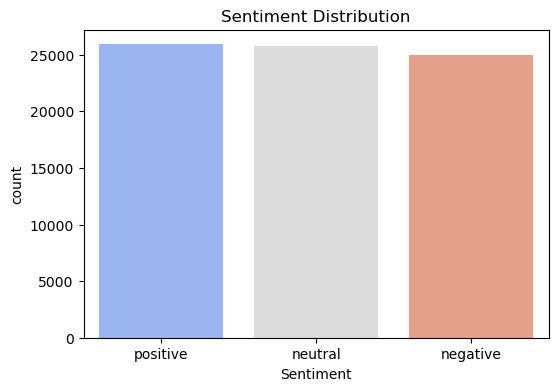

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

In [12]:
# Example review for each sentiment
for label in df["Sentiment"].unique():
    print(f"\n--- {label.upper()} Example ---")
    print(df[df["Sentiment"] == label]["clean_text"].iloc[0][:300])


--- POSITIVE Example ---
good quality product good cuality

--- NEUTRAL Example ---
bad quality look good front cover magnetic one kid open filter havent lock

--- NEGATIVE Example ---
hated poorwet single pee doesnt even last hour


In [13]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["Sentiment"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8281076852877909

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.86      0.83      4976
     neutral       0.79      0.72      0.75      5257
    positive       0.88      0.91      0.89      5108

    accuracy                           0.83     15341
   macro avg       0.83      0.83      0.83     15341
weighted avg       0.83      0.83      0.83     15341



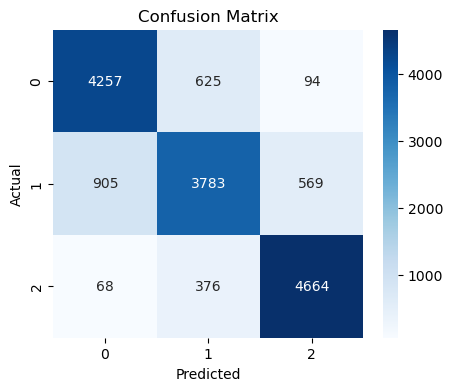

In [17]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
def predict_sentiment(review_text):
    cleaned = clean_text(review_text)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)[0]
    return prediction

# Test
sample = "it is okayish"
print("Review:", sample)
print("Predicted Sentiment:", predict_sentiment(sample))


Review: it is okayish
Predicted Sentiment: neutral


In [24]:
import joblib


In [26]:
joblib.dump(model, "trained_nlp_model.pkl")
joblib.dump(vectorizer, "trained_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc*100:.2f}%")


Naive Bayes: 82.81%
Logistic Regression: 84.56%
SVM: 84.24%
